# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from datetime import datetime
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len_city = len(cities)
print(len_city)

624


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Save config information.
city_count = 0;
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
weather_data = []

query_url = f"{url}appid={weather_api_key}&units={units}&q=" 

for city in cities:
    response = requests.get(query_url + city).json()
    city_count+=1;
    try:
        weather_data.append([city, 
                             response['coord']['lat'], response['coord']['lon'], 
                             response['main']['temp_max'], response['main']['humidity'],
                             response['clouds']['all'], response['wind']['speed'], 
                             response['sys']['country'], response['dt']])
        
        print(f'Processing {city}; {city_count} of {len_city}')
        
    except:
        print(f'city number {city_count} not found')
        
# Build partial query URL


Processing safaga; 1 of 624
Processing hay river; 2 of 624
Processing east london; 3 of 624
Processing vila; 4 of 624
Processing upernavik; 5 of 624
city number 6 not found
Processing ushuaia; 7 of 624
Processing bubaque; 8 of 624
Processing hilo; 9 of 624
Processing coroico; 10 of 624
Processing bredasdorp; 11 of 624
Processing guerrero negro; 12 of 624
Processing dikson; 13 of 624
Processing port elizabeth; 14 of 624
city number 15 not found
Processing nikolskoye; 16 of 624
Processing aksu; 17 of 624
Processing hermanus; 18 of 624
city number 19 not found
Processing pacific grove; 20 of 624
city number 21 not found
Processing khatanga; 22 of 624
Processing paamiut; 23 of 624
Processing cape town; 24 of 624
Processing constantine; 25 of 624
Processing ancud; 26 of 624
city number 27 not found
city number 28 not found
Processing manhush; 29 of 624
Processing punta arenas; 30 of 624
Processing iquitos; 31 of 624
city number 32 not found
Processing thompson; 33 of 624
Processing kloulklu

Processing pemangkat; 265 of 624
Processing fort nelson; 266 of 624
Processing jorochito; 267 of 624
city number 268 not found
Processing bismarck; 269 of 624
Processing apomu; 270 of 624
Processing torbay; 271 of 624
city number 272 not found
Processing husavik; 273 of 624
Processing sao filipe; 274 of 624
Processing xichang; 275 of 624
city number 276 not found
Processing aloleng; 277 of 624
Processing kenitra; 278 of 624
Processing port-gentil; 279 of 624
Processing clyde river; 280 of 624
Processing linqing; 281 of 624
Processing luau; 282 of 624
Processing wewak; 283 of 624
Processing karratha; 284 of 624
Processing balkhash; 285 of 624
Processing kohima; 286 of 624
Processing klaksvik; 287 of 624
Processing pidhorodne; 288 of 624
Processing praia da vitoria; 289 of 624
Processing makakilo city; 290 of 624
Processing shuiji; 291 of 624
Processing sao gabriel da cachoeira; 292 of 624
Processing eagle; 293 of 624
Processing homer; 294 of 624
Processing waslala; 295 of 624
Processing

Processing sinnamary; 523 of 624
Processing huarmey; 524 of 624
Processing zhashkiv; 525 of 624
Processing winchester; 526 of 624
Processing fayetteville; 527 of 624
Processing mahon; 528 of 624
Processing si racha; 529 of 624
Processing isoka; 530 of 624
Processing saint-augustin; 531 of 624
Processing odiongan; 532 of 624
Processing chilca; 533 of 624
Processing gourdon; 534 of 624
city number 535 not found
Processing sao miguel do araguaia; 536 of 624
Processing morant bay; 537 of 624
Processing belturbet; 538 of 624
Processing arraial do cabo; 539 of 624
city number 540 not found
Processing gualeguaychu; 541 of 624
city number 542 not found
Processing mpigi; 543 of 624
Processing jamiltepec; 544 of 624
Processing dale; 545 of 624
Processing naberera; 546 of 624
Processing san alejo; 547 of 624
Processing frontera; 548 of 624
Processing priiskovyy; 549 of 624
Processing black river; 550 of 624
Processing yokadouma; 551 of 624
Processing nuuk; 552 of 624
Processing tateyama; 553 of 6

In [18]:
weather_df = pd.DataFrame(weather_data, columns = ['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country', 'Date'])

weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,safaga,26.7292,33.9365,27.97,40,1,6.14,EG,1632196444
1,hay river,60.8156,-115.7999,7.99,87,20,2.06,CA,1632196181
2,east london,-33.0153,27.9116,13.52,50,0,7.72,ZA,1632196188
3,vila,42.0304,-8.1588,9.49,93,1,2.14,PT,1632196445
4,upernavik,72.7868,-56.1549,-5.17,81,68,2.06,GL,1632196445
...,...,...,...,...,...,...,...,...,...
554,pskov,57.8136,28.3496,3.95,87,75,3.00,RU,1632196657
555,ipixuna,-1.7625,-48.8043,23.97,89,82,2.57,BR,1632196657
556,andenes,69.3143,16.1194,7.99,57,0,8.75,NO,1632196658
557,shalakusha,62.2247,40.2539,-0.64,92,62,1.79,RU,1632196658


In [43]:
weather_df.to_csv(output_data_file, index = False)


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
#  Get the indices of cities that have humidity over 100%.
humid_index = weather_df[weather_df['Humidity'] > 100].index.tolist()

print(humid_index)

[]


In [24]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#data is clean but doing it anyway
clean_city = weather_df.drop(humid_index, inplace=False)
clean_city

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,safaga,26.7292,33.9365,27.97,40,1,6.14,EG,1632196444
1,hay river,60.8156,-115.7999,7.99,87,20,2.06,CA,1632196181
2,east london,-33.0153,27.9116,13.52,50,0,7.72,ZA,1632196188
3,vila,42.0304,-8.1588,9.49,93,1,2.14,PT,1632196445
4,upernavik,72.7868,-56.1549,-5.17,81,68,2.06,GL,1632196445
...,...,...,...,...,...,...,...,...,...
554,pskov,57.8136,28.3496,3.95,87,75,3.00,RU,1632196657
555,ipixuna,-1.7625,-48.8043,23.97,89,82,2.57,BR,1632196657
556,andenes,69.3143,16.1194,7.99,57,0,8.75,NO,1632196658
557,shalakusha,62.2247,40.2539,-0.64,92,62,1.79,RU,1632196658


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

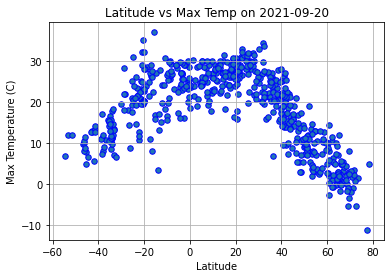

In [25]:
x = weather_df['Lat']
y = weather_df['Max Temp']
plt.scatter(x,y, s=30, edgecolors = 'b')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.title(f"Latitude vs Max Temp on {datetime.today().strftime('%Y-%m-%d')}")
plt.grid()
plt.show()


## Latitude vs. Humidity Plot

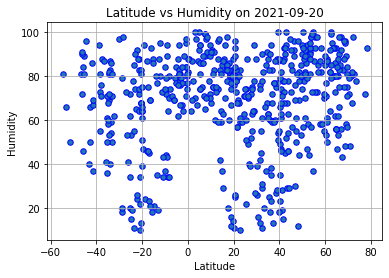

In [26]:
x = weather_df['Lat']
y = weather_df['Humidity']
plt.scatter(x,y, s=30, edgecolors = 'b')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title(f"Latitude vs Humidity on {datetime.today().strftime('%Y-%m-%d')}")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

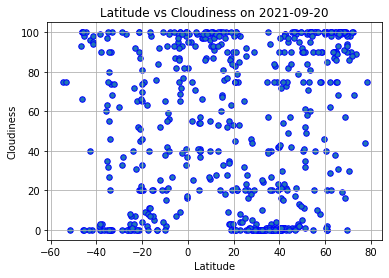

In [27]:
x = weather_df['Lat']
y = weather_df['Cloudiness']
plt.scatter(x,y, s=30, edgecolors = 'b')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title(f"Latitude vs Cloudiness on {datetime.today().strftime('%Y-%m-%d')}")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

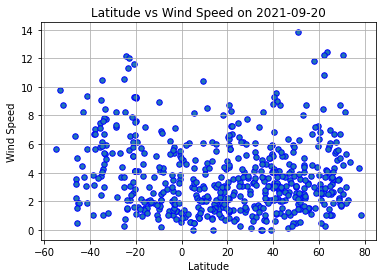

In [28]:
x = weather_df['Lat']
y = weather_df['Wind Speed']
plt.scatter(x,y, s=30, edgecolors = 'b')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title(f"Latitude vs Wind Speed on {datetime.today().strftime('%Y-%m-%d')}")
plt.grid()
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [29]:
def lin_reg_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y, s=30, edgecolors = 'b')
    plt.plot(x,regress_values,"r-", label = line_eq)
    plt.legend(loc='best')
    print(f"The r value is: {rvalue}")
    return line_eq



north_df = weather_df.loc[(weather_df['Lat'] >= 0)]
south_df = weather_df.loc[(weather_df['Lat'] < 0)]

The r value is: -0.8566802611894235


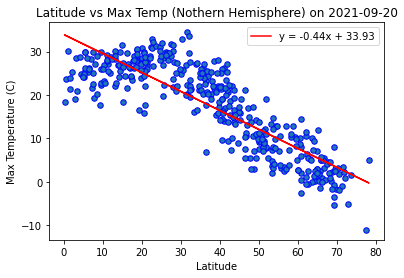

In [30]:
#Call function for regression data
lin_reg_plot(north_df['Lat'],north_df['Max Temp'])
#Add chart text
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.title(f"Latitude vs Max Temp (Nothern Hemisphere) on {datetime.today().strftime('%Y-%m-%d')}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.7054030125769745


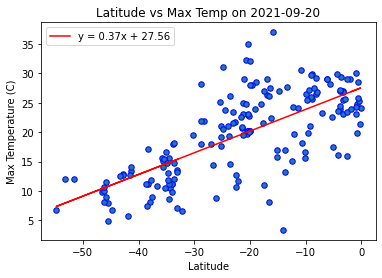

In [31]:
#Call function for regression data
lin_reg_plot(south_df['Lat'],south_df['Max Temp'])
#Add chart text
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.title(f"Latitude vs Max Temp on {datetime.today().strftime('%Y-%m-%d')}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.048287618196224256


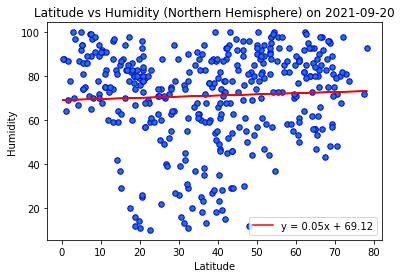

In [32]:
#Call function for regression values
lin_reg_plot(north_df['Lat'],north_df['Humidity'])
#add chart text
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title(f"Latitude vs Humidity (Northern Hemisphere) on {datetime.today().strftime('%Y-%m-%d')}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.08572060590888063


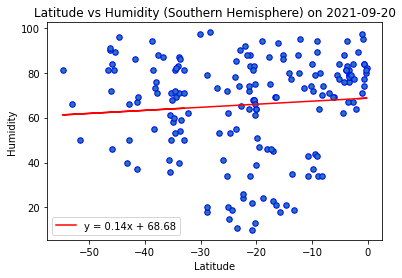

In [33]:
figure = lin_reg_plot(south_df['Lat'],south_df['Humidity'])

plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title(f"Latitude vs Humidity (Southern Hemisphere) on {datetime.today().strftime('%Y-%m-%d')}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.12543224770060984


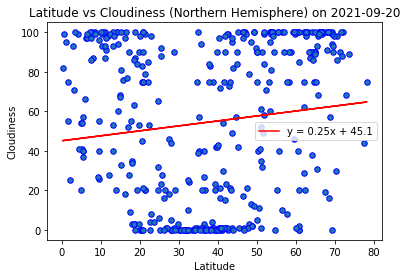

In [34]:
lin_reg_plot(north_df['Lat'],north_df['Cloudiness'])

plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title(f"Latitude vs Cloudiness (Northern Hemisphere) on {datetime.today().strftime('%Y-%m-%d')}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.11981430506335314


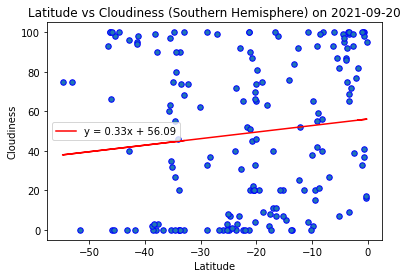

In [35]:
lin_reg_plot(south_df['Lat'],south_df['Cloudiness'])

plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title(f"Latitude vs Cloudiness (Southern Hemisphere) on {datetime.today().strftime('%Y-%m-%d')}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.15468786894723752


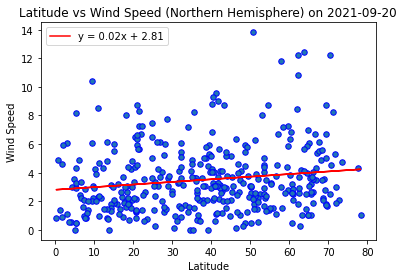

In [36]:
lin_reg_plot(north_df['Lat'],north_df['Wind Speed'])

plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title(f"Latitude vs Wind Speed (Northern Hemisphere) on {datetime.today().strftime('%Y-%m-%d')}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.28847906577717564


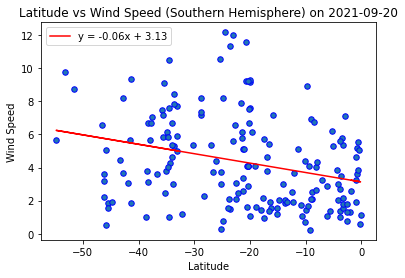

In [37]:
lin_reg_plot(south_df['Lat'],south_df['Wind Speed'])

plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title(f"Latitude vs Wind Speed (Southern Hemisphere) on {datetime.today().strftime('%Y-%m-%d')}")
plt.show()